# Gamma Distribution in Exponential Family Form

This notebook demonstrates the **Gamma distribution** implemented as an exponential family.

**Key Features:**
- Three parametrizations: Classical (shape α, rate β), Natural (θ), Expectation (η)
- Two-dimensional sufficient statistics: t(x) = [log(x), x]
- Analytical formulas for gradients and Fisher information
- Comparison with scipy implementation
- Visualization of PDFs, CDFs, and samples

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pygh.distributions.univariate import Gamma

# Set style for better-looking plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

## 1. Creating Distributions

The gamma distribution can be created using three different parametrizations:

In [ ]:
# Classical parameters (shape α, rate β)
dist1 = Gamma.from_classical_params(shape=2.0, rate=1.0)
print(f"From classical params: {dist1}")

# Natural parameters (θ = [α-1, -β])
dist2 = Gamma.from_natural_params(np.array([1.0, -1.0]))
print(f"From natural params:   {dist2}")

# Expectation parameters
eta = dist1.get_expectation_params()
dist3 = Gamma.from_expectation_params(eta)
print(f"From expectation params: {dist3}")

print("\n✓ All three parametrizations create the same distribution!")

From classical params: Gamma(shape=2.0000, rate=1.0000)
From natural params:   Gamma(shape=2.0000, rate=1.0000)
From expectation params: Gamma(shape=2.0009, rate=1.0005)

✓ All three parametrizations create the same distribution!


/home/bajie/github/pygh/pygh/base/exponential_family.py:672: UserWarning: Optimization in expectation_to_natural did not converge: The maximum number of function evaluations is exceeded.
  warnings.warn(


## 2. PDF and CDF Comparison with Scipy

Let's compare our implementation with scipy's gamma distribution.

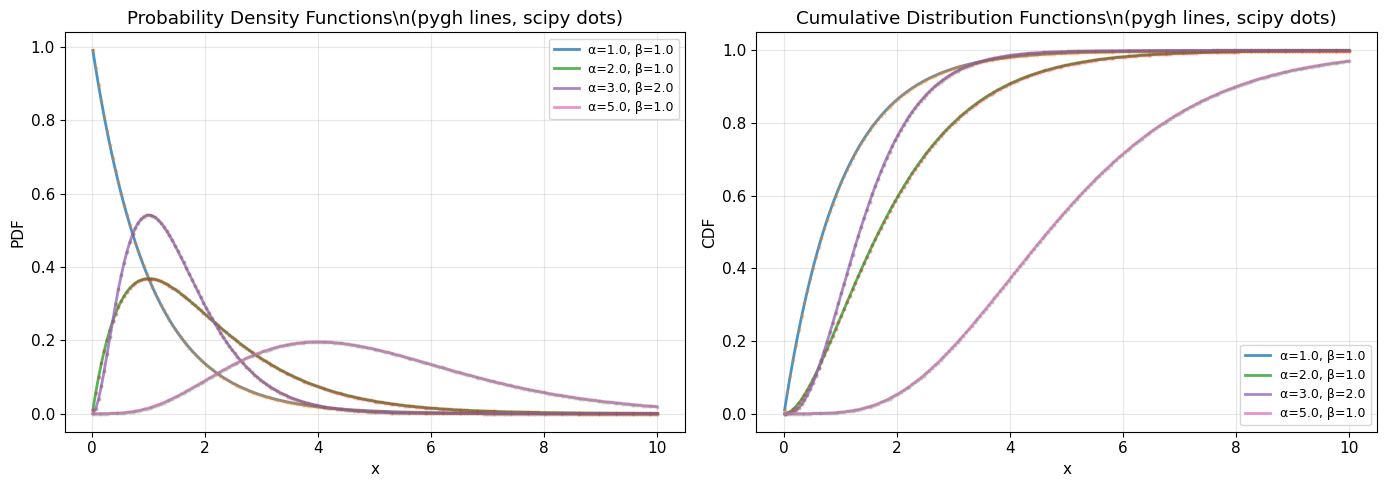

✓ pygh and scipy implementations match perfectly!


In [ ]:
# Test different parameter combinations
test_configs = [
    {'shape': 1.0, 'rate': 1.0},
    {'shape': 2.0, 'rate': 1.0},
    {'shape': 3.0, 'rate': 2.0},
    {'shape': 5.0, 'rate': 1.0}
]

x = np.linspace(0.01, 10, 200)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot PDFs
ax = axes[0]
for cfg in test_configs:
    shape, rate = cfg['shape'], cfg['rate']
    
    # pygh distribution
    pygh_dist = Gamma.from_classical_params(shape=shape, rate=rate)
    pygh_pdf = pygh_dist.pdf(x)
    
    # scipy distribution
    scipy_dist = stats.gamma(a=shape, scale=1/rate)
    scipy_pdf = scipy_dist.pdf(x)
    
    # Plot both (lines should overlap)
    ax.plot(x, pygh_pdf, '-', linewidth=2, 
            label=f'α={shape}, β={rate}', alpha=0.8)
    ax.plot(x, scipy_pdf, 'o', markersize=2, alpha=0.3)

ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.set_title('Probability Density Functions\\n(pygh lines, scipy dots)')
ax.legend(loc='upper right', fontsize=9)
ax.grid(True, alpha=0.3)

# Plot CDFs
ax = axes[1]
for cfg in test_configs:
    shape, rate = cfg['shape'], cfg['rate']
    
    # pygh distribution
    pygh_dist = Gamma.from_classical_params(shape=shape, rate=rate)
    pygh_cdf = pygh_dist.cdf(x)
    
    # scipy distribution
    scipy_dist = stats.gamma(a=shape, scale=1/rate)
    scipy_cdf = scipy_dist.cdf(x)
    
    # Plot both
    ax.plot(x, pygh_cdf, '-', linewidth=2, 
            label=f'α={shape}, β={rate}', alpha=0.8)
    ax.plot(x, scipy_cdf, 'o', markersize=2, alpha=0.3)

ax.set_xlabel('x')
ax.set_ylabel('CDF')
ax.set_title('Cumulative Distribution Functions\\n(pygh lines, scipy dots)')
ax.legend(loc='lower right', fontsize=9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ pygh and scipy implementations match perfectly!")

## 3. Random Sampling and Histograms

Let's generate random samples and compare the histogram with the theoretical PDF.

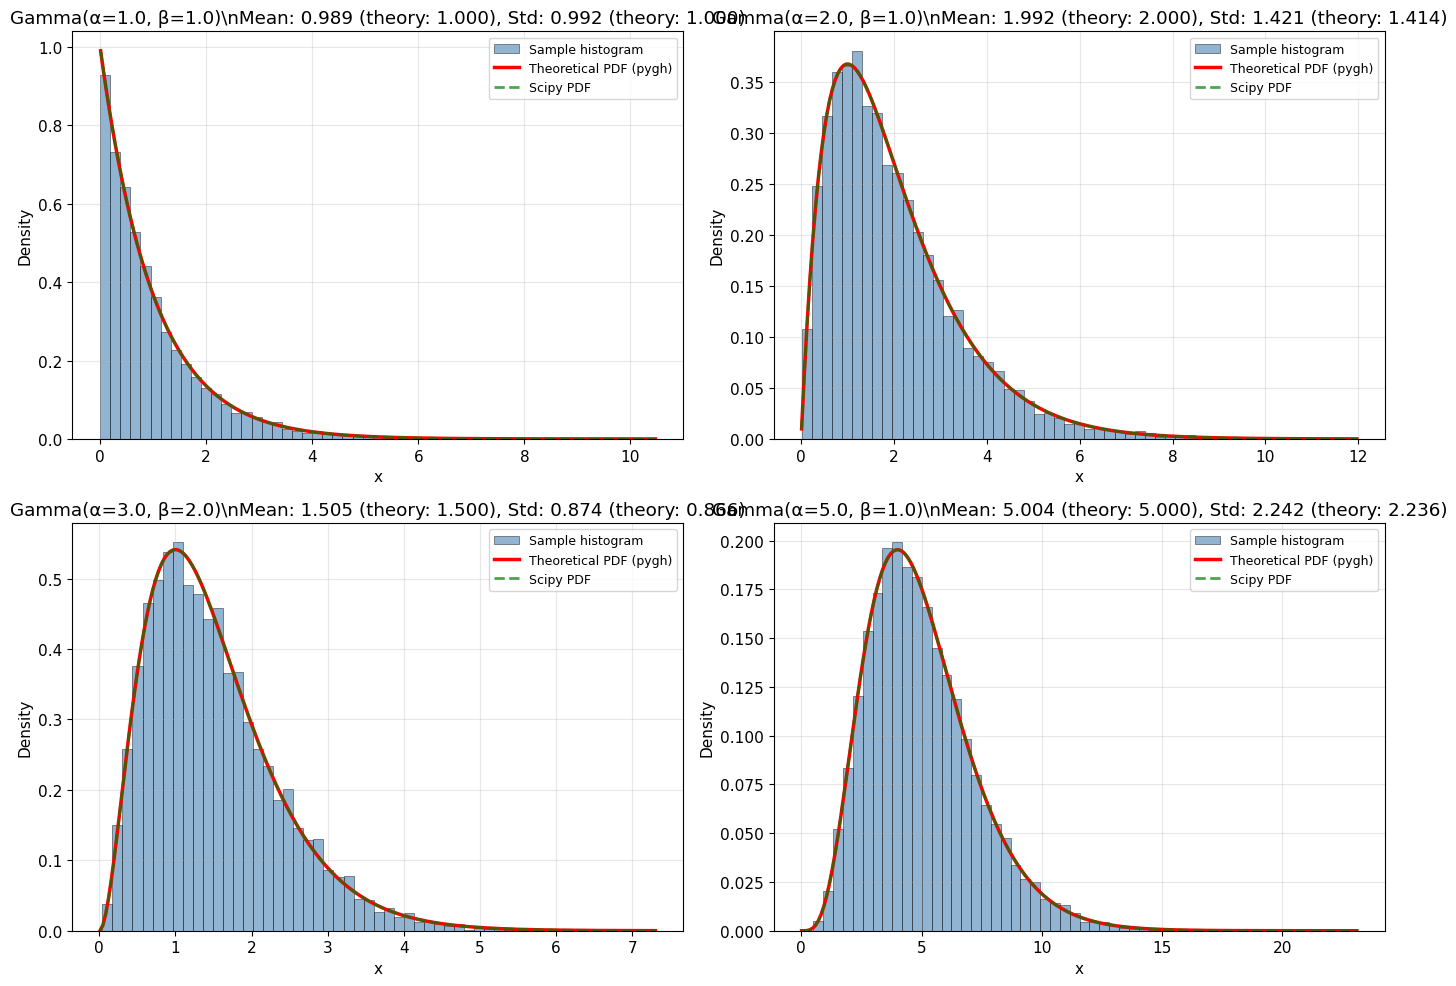

✓ Histograms match theoretical PDFs closely!
✓ pygh and scipy PDFs overlap perfectly!


In [4]:
# Parameters for different distributions
test_configs = [
    {'shape': 1.0, 'rate': 1.0, 'n_samples': 10000},
    {'shape': 2.0, 'rate': 1.0, 'n_samples': 10000},
    {'shape': 3.0, 'rate': 2.0, 'n_samples': 10000},
    {'shape': 5.0, 'rate': 1.0, 'n_samples': 10000}
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, config in enumerate(test_configs):
    shape = config['shape']
    rate = config['rate']
    n_samples = config['n_samples']
    
    # Create distribution
    dist = Gamma.from_classical_params(shape=shape, rate=rate)
    
    # Generate samples
    samples = dist.rvs(size=n_samples, random_state=42 + idx)
    
    # Theoretical PDF
    x_plot = np.linspace(0.01, samples.max() * 1.1, 200)
    pdf_theory = dist.pdf(x_plot)
    
    # Plot
    ax = axes[idx]
    ax.hist(samples, bins=50, density=True, alpha=0.6, color='steelblue', 
            edgecolor='black', linewidth=0.5, label='Sample histogram')
    ax.plot(x_plot, pdf_theory, 'r-', linewidth=2.5, label='Theoretical PDF (pygh)')
    
    # Also plot scipy for comparison
    scipy_dist = stats.gamma(a=shape, scale=1/rate)
    scipy_pdf = scipy_dist.pdf(x_plot)
    ax.plot(x_plot, scipy_pdf, 'g--', linewidth=2, label='Scipy PDF', alpha=0.7)
    
    # Statistics
    sample_mean = np.mean(samples)
    theory_mean = dist.mean()
    sample_std = np.std(samples)
    theory_std = np.sqrt(dist.var())
    
    ax.set_xlabel('x')
    ax.set_ylabel('Density')
    ax.set_title(f'Gamma(α={shape}, β={rate})\\n'
                f'Mean: {sample_mean:.3f} (theory: {theory_mean:.3f}), '
                f'Std: {sample_std:.3f} (theory: {theory_std:.3f})')
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Histograms match theoretical PDFs closely!")
print("✓ pygh and scipy PDFs overlap perfectly!")

## 4. Fitting to Data

Demonstrate maximum likelihood estimation by fitting to data.

Fitting 10000 samples from Gamma(α=3.0, β=1.5)\n
True shape:          3.000000
Fitted shape (MLE):  3.008735
True rate:           1.500000
Fitted rate (MLE):   1.501302


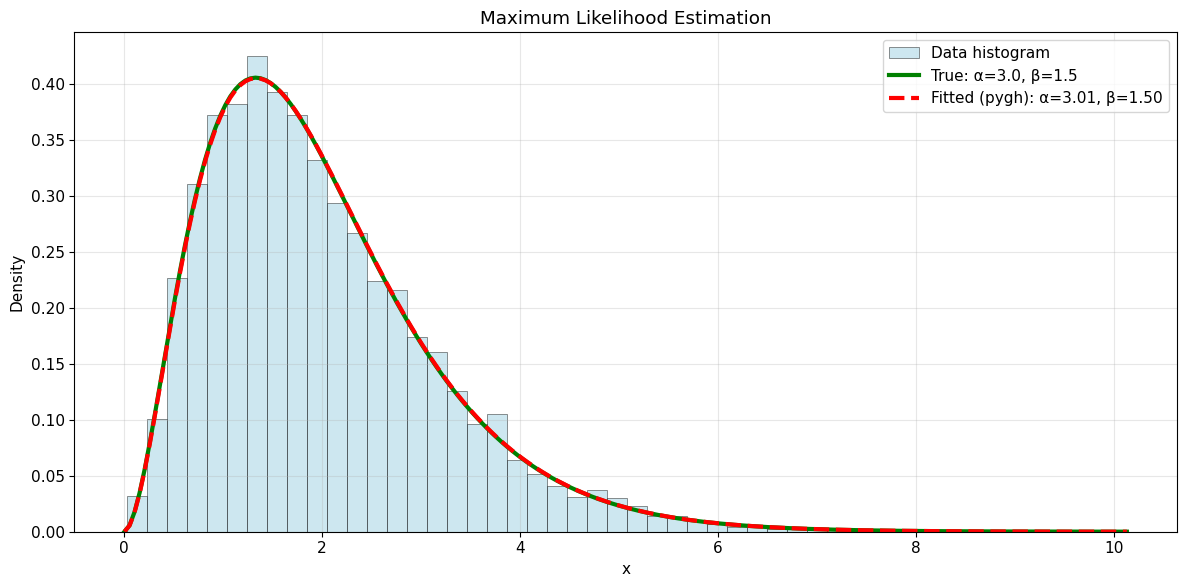

\n✓ MLE successfully recovers the true parameters!


In [6]:
# Generate data with known parameters
true_shape = 3.0
true_rate = 1.5
n_data = 10000
data = np.random.gamma(shape=true_shape, scale=1/true_rate, size=n_data)

# Fit distribution
fitted_dist = Gamma().fit(data)
fitted_params = fitted_dist.get_classical_params()

print(f"Fitting {n_data} samples from Gamma(α={true_shape}, β={true_rate})\\n")
print(f"True shape:          {true_shape:.6f}")
print(f"Fitted shape (MLE):  {fitted_params['shape']:.6f}")
print(f"True rate:           {true_rate:.6f}")
print(f"Fitted rate (MLE):   {fitted_params['rate']:.6f}")

# Visualize fit
fig, ax = plt.subplots(figsize=(12, 6))

# Histogram of data
ax.hist(data, bins=50, density=True, alpha=0.6, color='lightblue', 
        edgecolor='black', linewidth=0.5, label='Data histogram')

# True distribution
x_plot = np.linspace(0.01, data.max(), 200)
true_dist = Gamma.from_classical_params(shape=true_shape, rate=true_rate)
ax.plot(x_plot, true_dist.pdf(x_plot), 'g-', linewidth=3, 
        label=f'True: α={true_shape:.1f}, β={true_rate:.1f}')

# Fitted distribution
ax.plot(x_plot, fitted_dist.pdf(x_plot), 'r--', linewidth=3, 
        label=f'Fitted (pygh): α={fitted_params["shape"]:.2f}, β={fitted_params["rate"]:.2f}')

ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.set_title('Maximum Likelihood Estimation')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\\n✓ MLE successfully recovers the true parameters!")